<a href="https://colab.research.google.com/github/PrabaKDataScience/DS_Projects/blob/main/hr_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scope:
1. Identify the pattern for leaving employees
2. Predict the probablity of whether a employee will stay with organisation or not

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!cp '/content/drive/MyDrive/HR_comma_sep.csv' .


In [58]:
import pandas as pd
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
df.shape

(14999, 10)

In [60]:
for column in df.columns:
  count_nan = df[column].isnull().sum()
  print(f'Null values in column {column} is {count_nan}')

Null values in column satisfaction_level is 0
Null values in column last_evaluation is 0
Null values in column number_project is 0
Null values in column average_montly_hours is 0
Null values in column time_spend_company is 0
Null values in column Work_accident is 0
Null values in column left is 0
Null values in column promotion_last_5years is 0
Null values in column sales is 0
Null values in column salary is 0


In [61]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

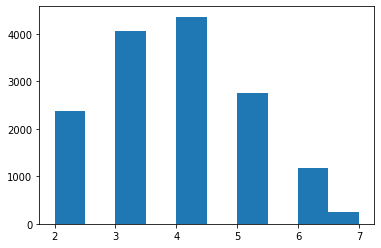

In [62]:
import matplotlib.pyplot as plt
plt.hist(df.number_project,bins=10);

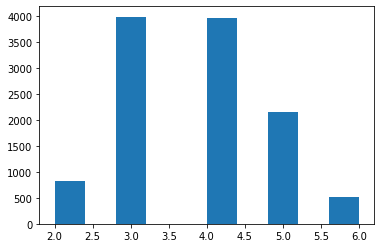

In [63]:
plt.hist(df.loc[df.left!=1]['number_project'],bins=10);

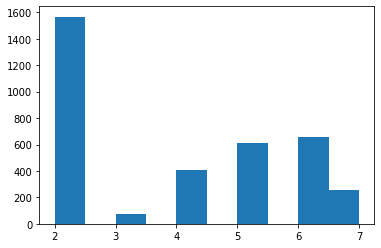

In [64]:
plt.hist(df.loc[df.left==1]['number_project'],bins=10,);

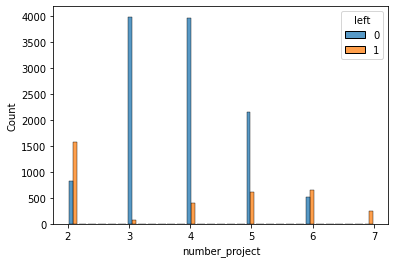

In [65]:
import seaborn as sns
sns.histplot(data=df, x="number_project", hue="left",multiple="dodge", shrink=.8)

> Based on the number of projects (HIGH) , the employee leaves the organisation , Also persons allocated to two projects also left organisation in a considerable amount, there could be additional reason such as project pressure, compensation , recognisation etc as a reason

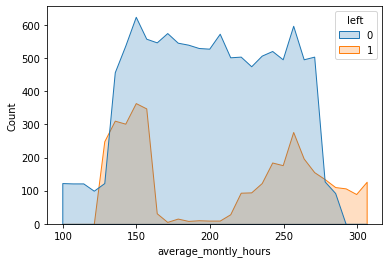

In [66]:
sns.histplot(data=df, x="average_montly_hours", hue="left",element='poly')

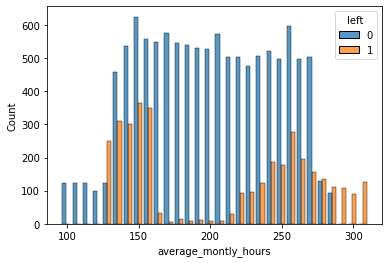

In [67]:

sns.histplot(data=df, x="average_montly_hours", hue="left",multiple="dodge", shrink=.8)


> Those who are working more hours , high probablity of leaving the organisation
---



In [68]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [69]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['department']=encoder.fit_transform(df['sales'])
df['salary']=df['salary'].map({'low':1,'medium':2,'high':3})

In [70]:
encoder.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [71]:
df.drop(['sales'],axis=1,inplace=True)

In [72]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department
0,0.38,0.53,2,157,3,0,1,0,1,7
1,0.80,0.86,5,262,6,0,1,0,2,7
2,0.11,0.88,7,272,4,0,1,0,2,7
3,0.72,0.87,5,223,5,0,1,0,1,7
4,0.37,0.52,2,159,3,0,1,0,1,7


In [73]:
features = df.drop('left',axis=1)

In [74]:
labels = df['left']

In [75]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(features,labels,test_size=0.2,random_state=42,stratify=labels)

In [76]:
print(f"The shape of the X_train {X_train.shape}")
print(f"The shape of the X_test {X_test.shape}")
print(f"The shape of the y_train {y_train.shape}")
print(f"The shape of the y_test {y_test.shape}")

The shape of the X_train (11999, 9)
The shape of the X_test (3000, 9)
The shape of the y_train (11999,)
The shape of the y_test (3000,)


In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['average_montly_hours','time_spend_company']] = scaler.fit_transform(X_train[['average_montly_hours','time_spend_company']])
print(X_train.average_montly_hours.min(), X_train.average_montly_hours.max())

X_test[['average_montly_hours','time_spend_company']] = scaler.fit_transform(X_test[['average_montly_hours','time_spend_company']])

0.0 0.9999999999999999


In [108]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(
    [
        ('clf',RandomForestClassifier())
    ]
)

model.fit(X_train.values,y_train.values)


Pipeline(steps=[('clf', RandomForestClassifier())])

In [109]:
y_pred = model.predict(X_test.values)

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [111]:
X_train.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department
12896,0.73,0.62,4,0.705607,0.25,0,0,1,7


# User Input

In [123]:
# User Input 
satisfaction_level = 0.7  #( 0 to 1 )
last_evaluation = 0.4   #(0 to 1 )
number_project = 2     #(Actual numbers)
average_monthly_hours = 200 #(Actual hours)
time_spend_company =  5 #(Actual hours per day)
Work_accident = 0 #(If incurred accident in working time)
promotion_last_5years = 1 #(Discrete o or 1 )
salary = 1 #( 1 for low , 2 for medium , 3 for high)
department = 3 #( {'IT':0, 'RandD':1, 'accounting':2, 'hr':3, 'management':4, 'marketing':5,'product_mng':6, 'sales':7, 'support':8, 'technical':9)

In [124]:
import numpy as np 
user_input_array=np.array([satisfaction_level,last_evaluation,number_project,average_monthly_hours,
                          time_spend_company,Work_accident,promotion_last_5years,
                          salary,department])

In [125]:
reshaped_test = np.expand_dims(user_input_array, axis=0)
#print(reshaped_test.shape)
pred = model.predict(reshaped_test)
pred_prob = model.predict_proba(reshaped_test)
if pred:
  print(f" The employee will leave the organisation , Probablity : {pred_prob[0][1]}")
else:
  print(f" The employee will stay with the organisation , Probablity : {pred_prob[0][0]}")


 The employee will stay with the organisation , Probablity : 0.57
